# BIG DATA ASSIGNMENT ( Candidate No: 795823), Group 2

## Business Objective and its context

This analysis aims to make a model which can predict the possibility of having a stroke from past data. The model will help to predict whether a patient is susceptible to a stroke or not based on variables such as their age, bmi etc. The analysis tried different modelling methods to find the best-suited model for this problem.


In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [80]:
# Reading the dataset 
trainset = pd.read_csv("trainset.csv")

# removing the unnecessery column
trainset = trainset.drop('Unnamed: 0', axis = 1)
# renaming 'yes' column to 'married' column
trainset = trainset.rename(columns = {'Yes': 'Married'})
trainset.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,Never_worked,Private,Self-employed,children,formerly smoked,never smoked,smokes,Male,Married,Urban,stroke
0,-1.385505,-0.322618,-0.235153,0.695092,-0.994035,-0.068367,-1.149684,-0.435465,2.503379,-0.458729,-0.768338,-0.422662,-0.841895,-1.392927,0.987831,0
1,-0.276505,-0.322618,-0.235153,-0.219766,-0.492541,-0.068367,0.869804,-0.435465,-0.399460,-0.458729,-0.768338,2.365954,1.187797,-1.392927,0.987831,0
2,0.521975,-0.322618,-0.235153,-0.274716,0.467648,-0.068367,0.869804,-0.435465,-0.399460,-0.458729,1.301511,-0.422662,1.187797,0.717913,0.987831,0
3,0.034015,3.099644,-0.235153,1.807485,1.839076,-0.068367,-1.149684,2.296394,-0.399460,2.179934,-0.768338,-0.422662,1.187797,0.717913,-1.012319,0
4,1.497895,3.099644,-0.235153,-0.880076,0.625450,-0.068367,-1.149684,2.296394,-0.399460,-0.458729,1.301511,-0.422662,-0.841895,0.717913,0.987831,0


In [81]:
# loading test data
testset = pd.read_csv("testset.csv")

# Removing unnecessery column
testset = testset.drop('Unnamed: 0', axis = 1)

### Train Models

In [82]:
# importing libraries and functions need 

# Importing gridserachcv for finding the best hyperparametes
from sklearn.model_selection import GridSearchCV

# Importing time to calcuate the time taken to run each model
import time

In [83]:
# seperating the array of predictors and targets


# drop stroke variabe for training set, but keep all others for thr array of predictors
Xtrain = trainset.drop('stroke', axis=1)

# Creating array of target by seperating the stroke column
ytrain = trainset['stroke'].copy()

### Baseline model

The baseline method used is the majority class classifier. The majority class is used as the prediction result for all the predictions. That is we predict all the data as majority class. 

In [84]:
# finding the number of instances belonging to each class
trainset['stroke'].value_counts()

0    3885
1     199
Name: stroke, dtype: int64

Here 0 represents no stroke and 1 represents stroke. So there are 3885 cases of no stroke and only 199 cases of stroke. Cases with no stroke are the majority class. 

In [85]:
# total size of the training set
trainset.shape[0]

4084

The baseline method will give the output as 0 (no stroke) in every case. This project uses Macro-averaging to find the accuracy measures. ( For macro-averaging, precision, recall and F-score are evaluated in each class separately and then averaged across classes)




For cases with no stroke (stroke = 0), accuracy measures will be :
* Precision: 3885/4084 = 0.951

* Recall: 3885/3885 = 1.0

* F-score: 2/(1/precision + 1/recall) = 0.975

For cases with stroke (stroke = 1), accuracy measures will be :
* Precision: 0.0/4088 = 0.0

* Recall: 0.0/199 = 0.0

* F-score: 0.0

Overall baseline scores = average of both the cases
* **Precision: 0.475**

* **Recall: 0.5**

* **F-score: 0.487**

### Model 1.    Random Forest

In [86]:
# importing random forest algorithm 
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

# specify the hyperparameters and their values
# 3 x 3 x 3 x 2 = 54 combinations in the grid
# The parameters were selected after trial and error to give the best f-score
param_grid = {
    'n_estimators': [10,30,50],
    'max_depth' : [3,5, None],
    'min_samples_split': [2, 5, 10],
    'random_state': [0,1]
}

# we'll use 5-fold cross-validation
rf_grid_search = GridSearchCV(rf, param_grid, cv=5,
                           scoring='f1_macro', 
                           return_train_score=True) 

# running the model and recording the time
start = time.time()
rf_grid_search.fit(Xtrain, ytrain)
end = time.time() - start
print(f"Took {end} seconds")

Took 18.366169691085815 seconds


In [87]:
rf_grid_search.best_estimator_

RandomForestClassifier(min_samples_split=5, n_estimators=10, random_state=1)

The best set of combinations of parameters are : min_samples_split=5, n_estimators=10, random_state=1 and max_depth = None. 

In [88]:
rf_grid_search.best_score_

0.505961623213761

The F- score obtained for random forest modelling with the best parameters mentioned above is 0.506.

In [109]:
# finding the index of the best performing model
rf_grid_search.cv_results_["rank_test_score"].tolist().index(1)

43

In [116]:
# storing the split score results for the best performing model
rf_split_test_scores = []
for x in range(5):
    # extract f-score of the best model (index=43) from each of the 5 splits
    val = rf_grid_search.cv_results_[f"split{x}_test_score"][43]
    rf_split_test_scores.append(val)

In [117]:
rf_split_test_scores

[0.48680904522613067,
 0.48584015103838896,
 0.5121491892885031,
 0.5328759291023443,
 0.5121338014134383]

In [89]:
val_scores = rf_grid_search.cv_results_["mean_test_score"]
train_scores = rf_grid_search.cv_results_["mean_train_score"]
params = [str(x) for x in rf_grid_search.cv_results_["params"]]

for val_score, train_score, param in sorted(zip(val_scores, train_scores, params), reverse=True):
    print(val_score, train_score, param)

0.505961623213761 0.7968568424045492 {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 10, 'random_state': 1}
0.5006714796576008 0.9328499394550928 {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 10, 'random_state': 0}
0.4962534364965833 0.987835209160781 {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 30, 'random_state': 1}
0.49232469426558706 0.7777867954901143 {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 30, 'random_state': 1}
0.4922603443532904 0.7607124516801786 {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50, 'random_state': 1}
0.4920025383113904 0.9986758198158695 {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50, 'random_state': 0}
0.49177589301984437 0.9916190259367521 {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 30, 'random_state': 0}
0.48751414792288406 0.536822098091562 {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50, 'random_state': 1}
0.48751414792288406 0.527433147

We can see the f-scores of all the models ran through the gridsearchcv. The performance doesn't show much variation between the models. There is some evidence of overfitting when the max_depth is set to None. The performance of these models on the training set is much higher than that of the Validation set.

In [90]:
# put them into a separate variable for convenience
feature_importances = rf_grid_search.best_estimator_.feature_importances_

# the order of the features in `feature_importances` is the same as in the Xtrain dataframe,
# so we can "zip" the two and print in the descending order:

for k, v in sorted(zip(feature_importances, Xtrain.columns), reverse=True):
    print(f"{v}: {k}")

age: 0.27656226647936705
avg_glucose_level: 0.2742036457832168
bmi: 0.22951626172972714
Urban: 0.037164256198004085
Male: 0.030689334612303103
Married: 0.02466023235494704
hypertension: 0.02263196339003182
heart_disease: 0.020932840030256267
Private: 0.019274389688860593
smokes: 0.019201224100172387
never smoked: 0.01618473002040289
Self-employed: 0.014429481525626788
formerly smoked: 0.01125781570967362
children: 0.003255246498380897
Never_worked: 3.631187902937319e-05


Age, average glucose level and bmi are shown as the most important features for predicting stroke. This is expected as the medical condition depends on the physical factors of the person. The employment status has the least effect on the target variable

In [148]:
# Saving the trained model to reuse it

import os
from joblib import dump

# create a folder where all trained models will be kept
if not os.path.exists("models"):
    os.makedirs("models")
    
dump(rf_grid_search.best_estimator_, 'models/rf-stroke.joblib')

['models/rf-stroke.joblib']

###  Model 2. Support Vector Machines

#### Linear SVM

In [99]:
from sklearn.svm import LinearSVC

lsvm = LinearSVC()

# specify the hyperparameters and their values
# 4 x 1 x2 = 8 combinations in the grid 
# the parameters were selected after trial and error to give the best f-score
param_grid = {
    'C': [100, 500, 750, 1000],
    'max_iter': [5000, 7000],
    'random_state': [0,1]
}

# we'll use 5-fold cross-validation
lsvm_grid_search = GridSearchCV(lsvm, param_grid, cv=5,
                           scoring='f1_macro', 
                           return_train_score=True) 

start = time.time()
lsvm_grid_search.fit(Xtrain, ytrain)
end = time.time() - start
print(f"Took {end} seconds")

C:\Users\richa\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\richa\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\richa\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\richa\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\richa\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

C:\Users\richa\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\richa\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\richa\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\richa\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\richa\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

C:\Users\richa\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\richa\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Took 57.24804067611694 seconds


C:\Users\richa\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [100]:
lsvm_grid_search.best_estimator_

LinearSVC(C=500, max_iter=7000, random_state=0)

In [101]:
lsvm_grid_search.best_score_

0.5273027003580737

The best model obtained has an f-score of 0.527 and the parameter settings for the model are C=500, max_iter=7000, and random_state=0.

In [102]:
val_scores = lsvm_grid_search.cv_results_["mean_test_score"]
train_scores = lsvm_grid_search.cv_results_["mean_train_score"]
params = [str(x) for x in lsvm_grid_search.cv_results_["params"]]

for val_score, train_score, param in sorted(zip(val_scores, train_scores, params), reverse=True):
    print(val_score, train_score, param)

0.5273027003580737 0.5289579919488163 {'C': 500, 'max_iter': 7000, 'random_state': 0}
0.5264829930514277 0.5318507082459742 {'C': 750, 'max_iter': 5000, 'random_state': 1}
0.5222655266226505 0.5154649323421712 {'C': 750, 'max_iter': 7000, 'random_state': 0}
0.5218352126911551 0.5167851702146562 {'C': 1000, 'max_iter': 7000, 'random_state': 0}
0.5178941782499036 0.5236587989047667 {'C': 500, 'max_iter': 5000, 'random_state': 0}
0.5167930552169058 0.5279899215827071 {'C': 1000, 'max_iter': 5000, 'random_state': 1}
0.5152037585765183 0.512315581934226 {'C': 500, 'max_iter': 7000, 'random_state': 1}
0.5116754262600616 0.50215964884754 {'C': 1000, 'max_iter': 7000, 'random_state': 1}
0.5057884241856901 0.5178327448241824 {'C': 500, 'max_iter': 5000, 'random_state': 1}
0.5018213252765377 0.5098516914073374 {'C': 750, 'max_iter': 7000, 'random_state': 1}
0.5012879506951359 0.5071977632515788 {'C': 100, 'max_iter': 5000, 'random_state': 0}
0.4963322079562394 0.4944700485450964 {'C': 100, 'max_

The f-scores for all the model combinations in the linear SVM are given above. it can be seen that for C values greater than 500, the models are slightly overfitting as the validation scores are less than that of the training scores.

#### Radial Basis Function

In [103]:
from sklearn.svm import SVC

svm = SVC()

# specify the hyperparameters and their values
# 4 x 3 x 1 x 2 = 24 combinations in the grid
param_grid = {
    'C': [100, 500, 750, 1000],
    'gamma': ["scale", "auto", 0.1],
    'kernel': ["rbf"],
    'random_state': [0,1]
}

# we'll use 5-fold cross-validation
rsvm_grid_search = GridSearchCV(svm, param_grid, cv=5,
                           scoring='f1_macro', 
                           return_train_score=True) 

start = time.time()
rsvm_grid_search.fit(Xtrain, ytrain)
end = time.time() - start
print(f"Took {end} seconds")

Took 47.78862285614014 seconds


In [104]:
rsvm_grid_search.best_estimator_

SVC(C=1000, gamma='auto', random_state=0)

In [105]:
rsvm_grid_search.best_score_

0.5315384734144126

The best model obtained has an f-score of 0.531 and the parameter settings for the model are C=1000, gamma='auto' and random_state=0.

In [108]:
val_scores = rsvm_grid_search.cv_results_["mean_test_score"]
train_scores = rsvm_grid_search.cv_results_["mean_train_score"]
params = [str(x) for x in rsvm_grid_search.cv_results_["params"]]

for val_score, train_score, param in sorted(zip(val_scores, train_scores, params), reverse=True):
    print(val_score, train_score, param)

0.5315384734144126 0.9122981270073725 {'C': 1000, 'gamma': 'auto', 'kernel': 'rbf', 'random_state': 1}
0.5315384734144126 0.9122981270073725 {'C': 1000, 'gamma': 'auto', 'kernel': 'rbf', 'random_state': 0}
0.5312313274298527 0.9033503378346623 {'C': 750, 'gamma': 'scale', 'kernel': 'rbf', 'random_state': 1}
0.5312313274298527 0.9033503378346623 {'C': 750, 'gamma': 'scale', 'kernel': 'rbf', 'random_state': 0}
0.5310540776147976 0.9033503378346623 {'C': 750, 'gamma': 'auto', 'kernel': 'rbf', 'random_state': 1}
0.5310540776147976 0.9033503378346623 {'C': 750, 'gamma': 'auto', 'kernel': 'rbf', 'random_state': 0}
0.529353537070205 0.9446747364380604 {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf', 'random_state': 1}
0.529353537070205 0.9446747364380604 {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf', 'random_state': 0}
0.5290927361094075 0.9122981270073725 {'C': 1000, 'gamma': 'scale', 'kernel': 'rbf', 'random_state': 1}
0.5290927361094075 0.9122981270073725 {'C': 1000, 'gamma': 'scale', 'kernel': 'rbf

The f-scores for all the model combinations in the rbf SVM are given above. it can be seen that every model is overfitting as the f scores obtained in the training set is very high compared to the scores obtained during validation. It can be seen that the best scores are obtained at the highest C values.

#### Polynomial SVM

In [119]:
from sklearn.svm import SVC

svm_poly = SVC(kernel="poly")

# specify the hyperparameters and their values
# 6 x 3 = 18 combinations in the grid
param_grid = {
    'C': [500, 750, 1000],
    'gamma': ["auto"],
    'random_state': [0,1],
}

# we'll use 5-fold cross-validation
psvm_grid_search = GridSearchCV(svm_poly, param_grid, cv=5,
                           scoring='f1_macro', 
                           return_train_score=True) 

start = time.time()
psvm_grid_search.fit(Xtrain, ytrain)
end = time.time() - start
print(f"Took {end} seconds")

Took 120.7917902469635 seconds


In [120]:
psvm_grid_search.best_estimator_

SVC(C=750, gamma='auto', kernel='poly', random_state=0)

In [121]:
psvm_grid_search.best_score_

0.5265692530855564

The best polynomial SVC model has an f-score of 0.526 with C = 750, gamma='auto', kernel='poly', random_state=0.

In [122]:
val_scores = psvm_grid_search.cv_results_["mean_test_score"]
train_scores = psvm_grid_search.cv_results_["mean_train_score"]
params = [str(x) for x in psvm_grid_search.cv_results_["params"]]

for val_score, train_score, param in sorted(zip(val_scores, train_scores, params), reverse=True):
    print(val_score, train_score, param)

0.5265692530855564 0.791964153686107 {'C': 750, 'gamma': 'auto', 'random_state': 1}
0.5265692530855564 0.791964153686107 {'C': 750, 'gamma': 'auto', 'random_state': 0}
0.5245496805851347 0.8002608379974262 {'C': 1000, 'gamma': 'auto', 'random_state': 1}
0.5245496805851347 0.8002608379974262 {'C': 1000, 'gamma': 'auto', 'random_state': 0}
0.5201349924274624 0.7723205474442929 {'C': 500, 'gamma': 'auto', 'random_state': 1}
0.5201349924274624 0.7723205474442929 {'C': 500, 'gamma': 'auto', 'random_state': 0}


We can see validation and training f-scores for all the model combinations. The results show clear evidence of overfitting as every model shows high training scores than the validation scores.

The rbf SVM is the best model within the SVM models. So we are saving the rbf SVM model for further use

In [134]:

import os
from joblib import dump

# create a folder where all trained models will be kept
if not os.path.exists("models"):
    os.makedirs("models")
    
dump(rsvm_grid_search.best_estimator_, 'models/svm-rbf-stroke.joblib')

['models/svm-rbf-stroke.joblib']

The f-scores of the random forest model and SVM model are close. Therefore, a significance test is done in order to decide whether there is a significant difference between the models.

In [135]:
# the values for the rbf SVM is choosen here since it is the best within SVM models
# obtain the f-scores of the best models in each split

svmrbf_split_test_scores = []
for x in range(5):
    # extract f-score of the best model (at index=0) from each of the 5 splits
    val = rsvm_grid_search.cv_results_[f"split{x}_test_score"][0]
    svmrbf_split_test_scores.append(val)

In [136]:
# Performing the t test
# return the t-score and a two-tailed p-value
from scipy.stats import ttest_ind
ttest_ind(rf_split_test_scores, svmrbf_split_test_scores)

Ttest_indResult(statistic=-0.6779345259999697, pvalue=0.5169373517917911)

The p-value of the t-test is 0.5, which is greater than the significance level of 0.05. This indicates that there is no significant difference between the Random forest model and rbf SVM model.

## Balancing in python - Oversampling

The dataset is imbalanced. therefore oversampling is applied to balance the data and then the best model found - rbf SVM is applied to the balanced data

In [137]:
# importing librares for oversampling and logistic regression
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

In [142]:
# Performing the best oversampling and then applying the rbf SVM model
pipeline = Pipeline([
        ('smote', SMOTE()),
        ('svm', SVC())
    ])

param_grid = [
    {
        'smote__sampling_strategy': [0.5, 0.75, 1.0],
        'svm__C': [100, 500, 750, 1000],
        'svm__gamma': ["scale", "auto", 0.1],
        'svm__kernel': ["rbf"],
        'svm__random_state': [0,1]
        
    },
]


# we'll use 5-fold cross-validation
svm_grid_search = GridSearchCV(pipeline, param_grid, cv=5, 
                              scoring='f1_macro',
                              return_train_score=True)

svm_grid_search.fit(Xtrain, ytrain)

start = time.time()
svm_grid_search.fit(Xtrain, ytrain)
end = time.time() - start
print(f"Took {end} seconds")

Took 1912.6630613803864 seconds


In [143]:
svm_grid_search.best_estimator_

Pipeline(steps=[('smote', SMOTE(sampling_strategy=0.5)),
                ('svm', SVC(C=100, random_state=1))])

In [144]:
svm_grid_search.best_score_

0.5445105879316027

The f-score obtained for the best model is 0.544 with oversampling with a sampling strategy = 0.5 and SVM parameters C= 100 and random_state=1.

We can see that even after balancing the data, there is no significant increase in the model's f-score.

In [145]:
# Saving the balanced SVM model

import os
from joblib import dump

# create a folder where all trained models will be kept
if not os.path.exists("models"):
    os.makedirs("models")
    
dump(svm_grid_search.best_estimator_, 'models/svm-bal-stroke.joblib')

['models/svm-bal-stroke.joblib']

### Model 4. Logistic regression

In [126]:


pipeline = Pipeline([
        ('smote', SMOTE()),
        ('log', LogisticRegression(random_state=42))
    ])

param_grid = [
    {
        'smote__sampling_strategy': [0.5, 0.75, 1.0, 'auto'],
        'log__C': [100, 500, 750, 1000],
    },
]


# we'll use 5-fold cross-validation
ls_grid_search = GridSearchCV(pipeline, param_grid, cv=5, 
                              scoring='f1_macro',
                              return_train_score=True)

ls_grid_search.fit(Xtrain, ytrain)

start = time.time()
ls_grid_search.fit(Xtrain, ytrain)
end = time.time() - start
print(f"Took {end} seconds")

Took 2.717388868331909 seconds


In [127]:
ls_grid_search.best_estimator_

Pipeline(steps=[('smote', SMOTE(sampling_strategy=0.5)),
                ('log', LogisticRegression(C=500, random_state=42))])

In [128]:
ls_grid_search.best_score_

0.5767052889122333

We can see that the best model obtained by the logistic regression method after balancing the data has an f-score of 0.577 with logistic regression parameters as  C=500 and random_state=42 and with a sampling strategy of 0.5.

In [146]:
# Saving the balanced Logistic regression model

import os
from joblib import dump

# create a folder where all trained models will be kept
if not os.path.exists("models"):
    os.makedirs("models")
    
dump(ls_grid_search.best_estimator_, 'models/ls-bal-stroke.joblib')

['models/ls-bal-stroke.joblib']

## Testing best models

All four models are now tested on the test set to find out the best models to use.

In [149]:
# importing all the models
from joblib import load

best_rf = load("models/rf-stroke.joblib")
best_svm = load("models/svm-rbf-stroke.joblib")
best_bal_svm = load('models/svm-bal-stroke.joblib')
best_bal_ls = load('models/ls-bal-stroke.joblib')

In [150]:
# drop labels for training set, but keep all others
Xtest = testset.drop('stroke', axis=1)
ytest = testset['stroke'].copy()

### 1. Testing Random Forest model

In [151]:
from sklearn.metrics import precision_recall_fscore_support

# rf
yhat = best_rf.predict(Xtest)

# micro-averaged precision, recall and f-score
p, r, f, s = precision_recall_fscore_support(ytest, yhat, average="macro")
print("Random Forest:")
print(f"Precision: {p}")
print(f"Recall: {r}")
print(f"F score: {f}")

Random Forest:
Precision: 0.6430213464696223
Recall: 0.5179402677651905
F score: 0.5226226442238527


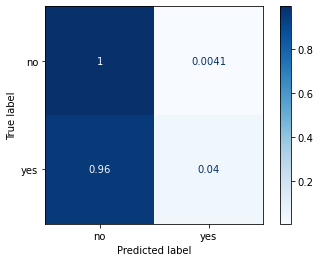

In [154]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(rf_grid_search.best_estimator_, Xtest, ytest,
                                 display_labels=["no", "yes"],
                                 cmap=plt.cm.Blues,
                                 normalize='true')

### 2. Testing SVM model

In [155]:
# svm
yhat = best_svm.predict(Xtest)

# micro-averaged precision, recall and f-score
p, r, f, s = precision_recall_fscore_support(ytest, yhat, average="macro")
print("SVM:")
print(f"Precision: {p}")
print(f"Recall: {r}")
print(f"F score: {f}")

SVM:
Precision: 0.5398895169578624
Recall: 0.5383728115345006
F score: 0.5391051482321323


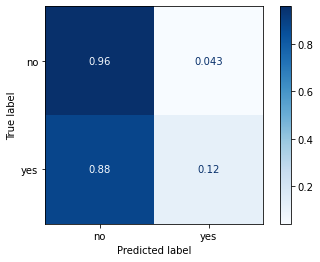

In [156]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(rsvm_grid_search.best_estimator_, Xtest, ytest,
                                 display_labels=["no", "yes"],
                                 cmap=plt.cm.Blues,
                                 normalize='true')

### 3. Testing balanced SVM model

In [157]:
# balanced svm
yhat = best_bal_svm.predict(Xtest)

# micro-averaged precision, recall and f-score
p, r, f, s = precision_recall_fscore_support(ytest, yhat, average="macro")
print("SVM:")
print(f"Precision: {p}")
print(f"Recall: {r}")
print(f"F score: {f}")

SVM:
Precision: 0.539163503524644
Recall: 0.556529351184346
F score: 0.5449476941706751


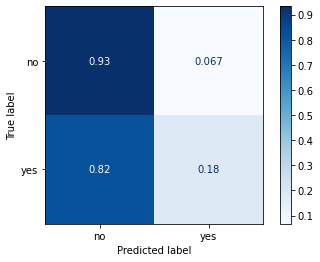

In [158]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(svm_grid_search.best_estimator_, Xtest, ytest,
                                 display_labels=["no", "yes"],
                                 cmap=plt.cm.Blues,
                                 normalize='true')

### 4. Balanced Logistic Regression Model

In [159]:
# balanced logistic regression
yhat = best_bal_ls.predict(Xtest)

# micro-averaged precision, recall and f-score
p, r, f, s = precision_recall_fscore_support(ytest, yhat, average="macro")
print("SVM:")
print(f"Precision: {p}")
print(f"Recall: {r}")
print(f"F score: {f}")

SVM:
Precision: 0.5805619023440806
Recall: 0.7745211122554068
F score: 0.5925778132482044


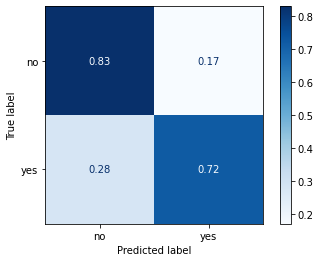

In [160]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(ls_grid_search.best_estimator_, Xtest, ytest,
                                 display_labels=["no", "yes"],
                                 cmap=plt.cm.Blues,
                                 normalize='true')

After checking the F-score, precision and recall, we can say that the logistic regression model made from the balanced data is showing the best performance out of all 4 models. The logistic regression model has a precision of 0.58, recall of 0.77 with an F-score of 0.59. 
Also from the confusion matrixes, we notice that the probability of correctly predicting a stroke case is only 0.04 for the random forest model, 0.12 for rbf-svm model, and 0.18 for svm model trained on balanced data. All three models fail in predicting true cases of stroke. The logistic regression model trained on balanced data shows the best performance with correctly predicting 0.72 per cent of true strokes cases. 
It is slightly concerning that 0.2 per cent of true stroke cases are wrongly predicted by this model. This can lead to bigger problems.


The accuracy of the models can be further improved by:
1. Including more relevant predictors such as cholesterol levels, systolic and diastolic blood pressure etc. 
2. Increasing the number of data records available. Algorithms can learn and train better when there are enough data available.
3. Applying feature engineering to some of the features and thus bringing in relevant ones
4. Applying a more precise and detailed hyperparameter tuning for the models
5. Also different models like C&R tree or artificial Neural network can be applied to the data and check if the performance improves.


The model can be used by stakeholders in the medical and pharmaceutical industries. The model can be used in the hospitals as additional support to the doctors and patients in detecting stroke. But care should be taken while using this model as there is a 28% chance that the model could give a wrong result for a stroke case. Also, medical insurance companies can use this analysis to promote plans directed specifically to different groups of customers.

##### Checking the word count

In [161]:
%%javascript
var nb = IPython.notebook;
var kernel = IPython.notebook.kernel;
var command = "NOTEBOOK_FULL_PATH = '" + nb.notebook_path + "'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [164]:
import io
from nbformat import read, NO_CONVERT

with io.open(NOTEBOOK_FULL_PATH.split("/")[-1], 'r', encoding='utf-8') as f:
    nb = read(f, NO_CONVERT)

word_count = 0
for cell in nb.cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print(f"Word count: {word_count}")

Word count: 1132
